# Machine Learning Engineer - LuizaLabs Desafio

In [56]:
# import de pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# definição de variváveis
train_path = '../dataset/challenge_train.csv'
test_path = '../dataset/challenge_test.csv'

target = 'strategy'

In [58]:
# coleta dos dados
df_train = pd.read_csv(train_path, sep = ';')
df_train.drop(columns='id', inplace=True)

df_test = pd.read_csv(test_path)
df_test.drop(columns='id', inplace=True)

## EDA

In [59]:
df_train

,name,mana,attack,health,type,god,strategy
0,Firewine,5,0,0,spell,nature,early
1,Leyhoard Hatchling,10,2,1,creature,magic,late
2,Aetherfuel Alchemist,6,4,4,creature,neutral,late
3,Millenium Matryoshka,4,2,2,creature,neutral,late
4,Poison Peddler,4,1,3,creature,neutral,late
...,...,...,...,...,...,...,...
783,Living Container,2,1,1,creature,death,early
784,Famished Ghoul,4,4,4,creature,death,late
785,The Iron Horse,7,5,5,creature,neutral,late
786,Golem Excavator,7,6,7,creature,neutral,late


In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      788 non-null    object
 1   mana      788 non-null    int64 
 2   attack    788 non-null    int64 
 3   health    788 non-null    int64 
 4   type      788 non-null    object
 5   god       788 non-null    object
 6   strategy  788 non-null    object
dtypes: int64(3), object(4)
memory usage: 43.2+ KB


In [61]:
# Seleção de features numéricas
numerical_data = df_train.select_dtypes(include='number')
# append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 3 numerical features: 

['mana', 'attack', 'health']


In [62]:
# Seleção de features categoricas
categorical_data=df_train.drop(columns='name').select_dtypes(include= 'object')
# append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 3 categorical features: 

['type', 'god', 'strategy']


### Análise Numéricas

In [63]:
# Describe
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mana,788.0,3.572335,2.190100,0.0,2.0,3.0,5.0,16.0
attack,788.0,2.140863,2.215047,0.0,0.0,2.0,3.0,13.0
health,788.0,2.583756,2.455053,0.0,0.0,2.0,4.0,17.0


In [64]:
# Nulos
numerical_data.isnull().sum()

mana      0
attack    0
health    0
dtype: int64

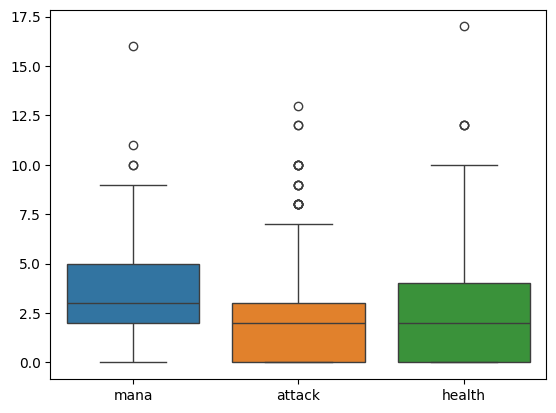

In [65]:
# Boxplot
sns.boxplot(numerical_data)
plt.show()

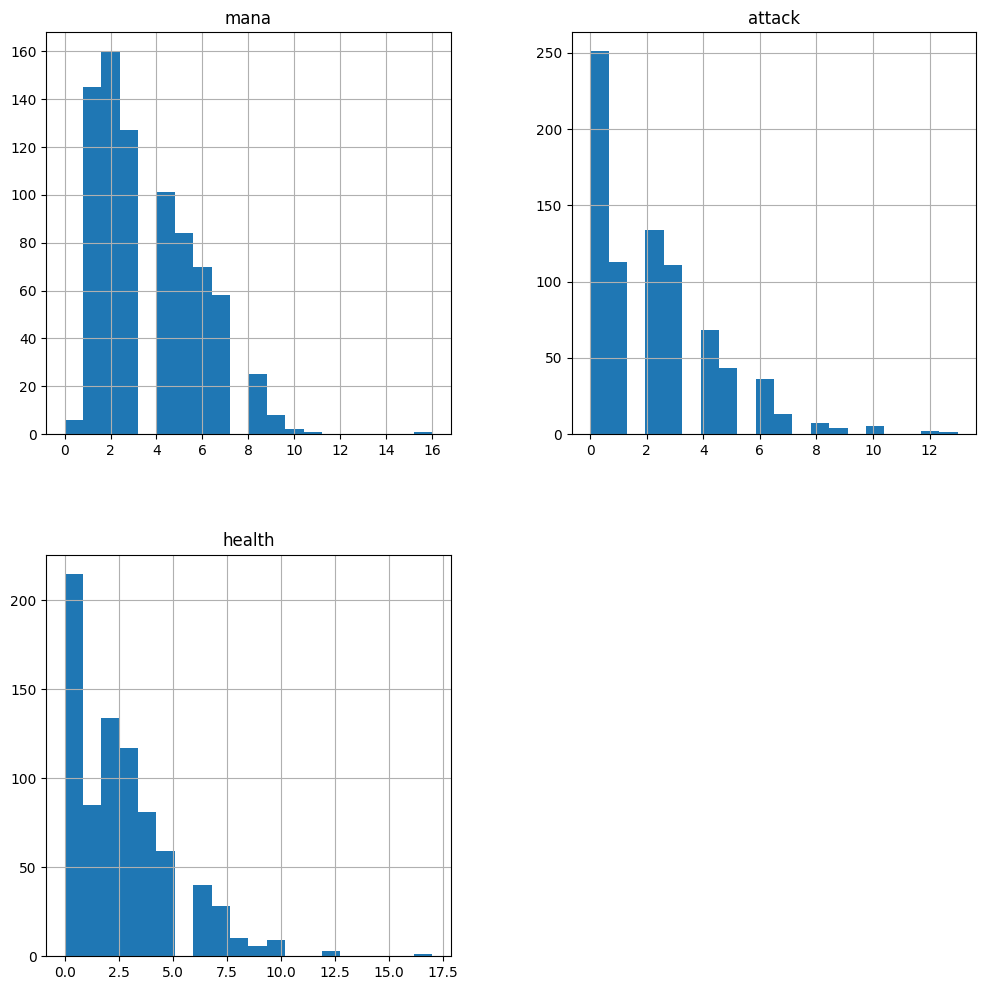

In [66]:
# Histograma
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

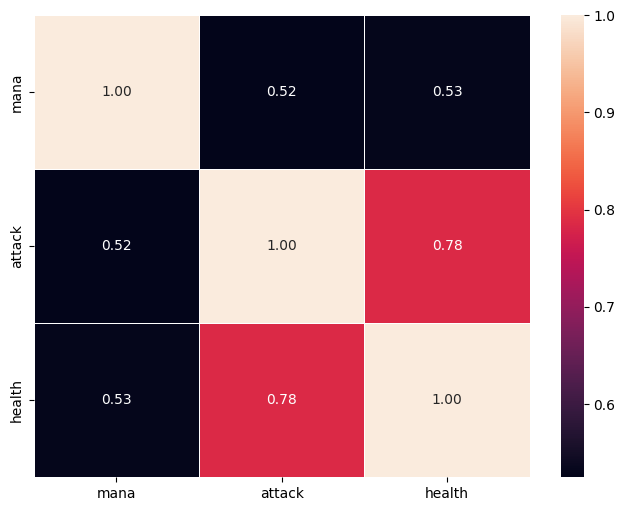

In [67]:
plt.figure(figsize=(8,6))
sns.heatmap(numerical_data.corr(method = 'pearson'),annot=True,fmt=".2f", linewidth=.5)
plt.show()

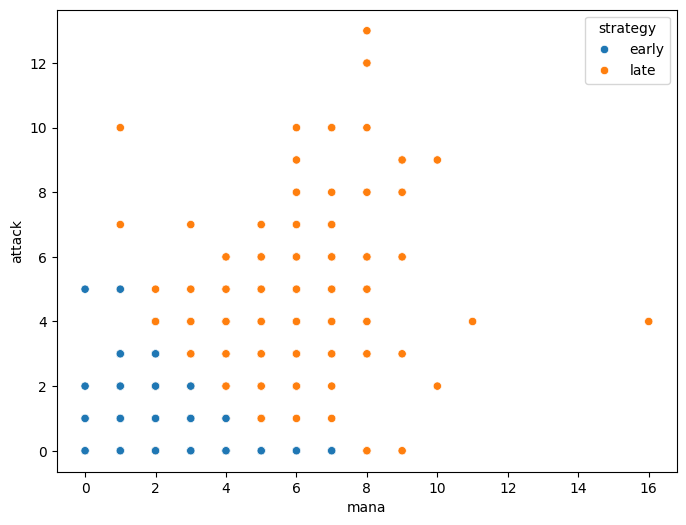

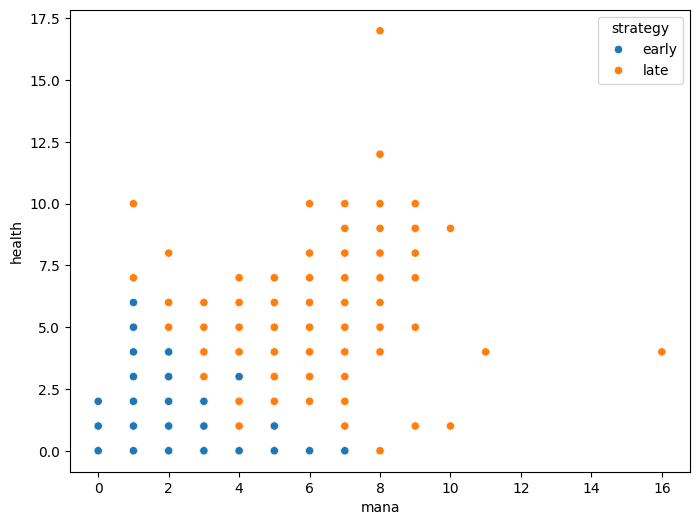

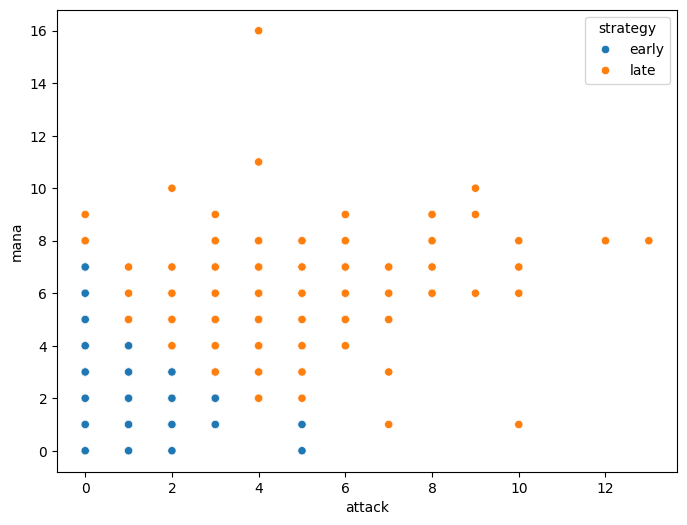

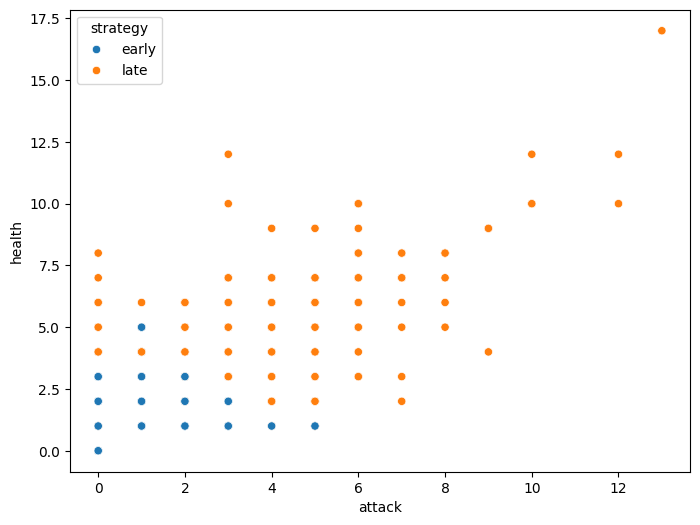

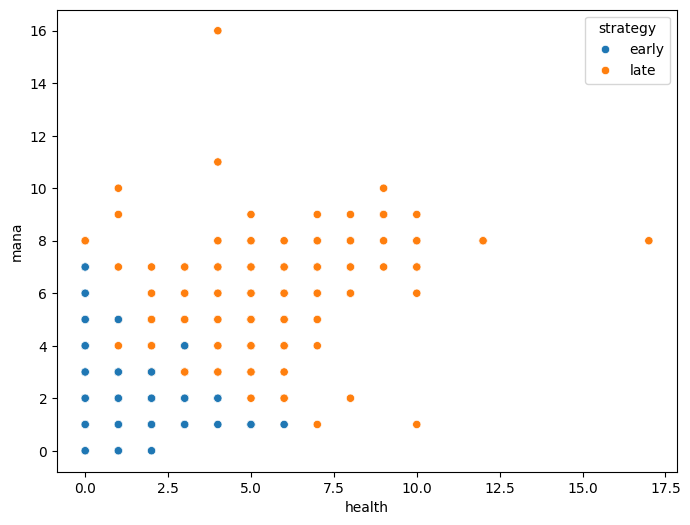

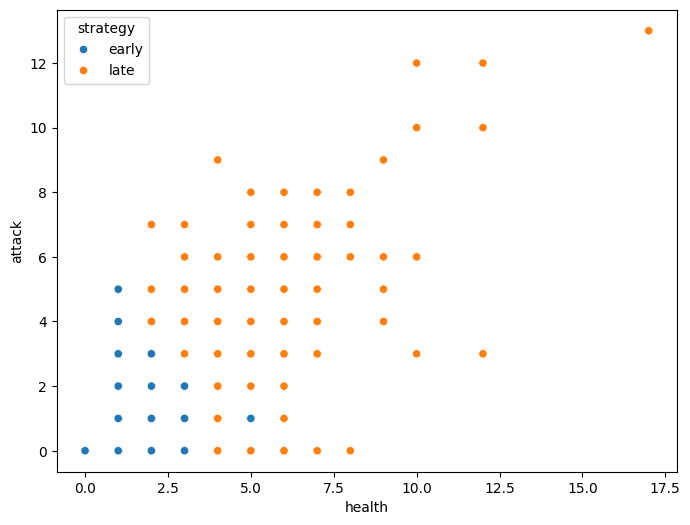

In [68]:
for labelx in numerical_data.columns:
    for labely in numerical_data.columns:
        if labelx != labely:
            plt.figure(figsize=(8,6))
            sns.scatterplot(numerical_data,
                    x = labelx,
                    y = labely ,
                    hue = df_train[target]
                    )
            plt.show()

In [69]:
categorical_data.describe(include='object').T

,count,unique,top,freq
type,788,4,creature,526
god,788,7,neutral,276
strategy,788,2,early,432


In [70]:
import joblib
from sklearn.preprocessing import OneHotEncoder

In [71]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(categorical_data.drop(columns='strategy'))

# save OneHotEncoder
joblib.dump(enc, "../models/OneHotEncoder_model.pkl") 

['../models/OneHotEncoder_model.pkl']

In [72]:
categorical_features.remove('strategy')

In [19]:
categorical_features

['type', 'god']

In [20]:
# load
enc = joblib.load("../models/OneHotEncoder_model.pkl") 
enc.get_feature_names_out(categorical_features)

array(['type_creature', 'type_god power', 'type_spell', 'type_weapon',
       'god_death', 'god_deception', 'god_light', 'god_magic',
       'god_nature', 'god_neutral', 'god_war'], dtype=object)

In [21]:
pd.DataFrame(enc.transform(categorical_data.drop(columns='strategy')).toarray(), columns=enc.get_feature_names_out(categorical_features))

,type_creature,type_god power,type_spell,type_weapon,god_death,god_deception,god_light,god_magic,god_nature,god_neutral,god_war
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
783,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
784,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
785,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
786,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [23]:
X = pd.concat([numerical_data, pd.DataFrame(enc.transform(categorical_data.drop(columns='strategy')).toarray(), columns=enc.get_feature_names_out(categorical_features))],
              axis = 1)
X

,mana,attack,health,type_creature,type_god power,type_spell,type_weapon,god_death,god_deception,god_light,god_magic,god_nature,god_neutral,god_war
0,5,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,10,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,6,4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,1,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,2,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
784,4,4,4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
785,7,5,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
786,7,6,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
y = df_train[target]
y

0      early
1       late
2       late
3       late
4       late
       ...  
783    early
784     late
785     late
786     late
787    early
Name: strategy, Length: 788, dtype: object

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(y_train.shape)
print(y_test.shape)

(527,)
(261,)


In [26]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [ ]:
test = classification_report(y_train, clf.predict(X_train), output_dict=True)

In [55]:
pd.DataFrame(data=test).to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>early</th>\n      <th>late</th>\n      <th>accuracy</th>\n      <th>macro avg</th>\n      <th>weighted avg</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>precision</th>\n      <td>0.982993</td>\n      <td>1.000000</td>\n      <td>0.990512</td>\n      <td>0.991497</td>\n      <td>0.990674</td>\n    </tr>\n    <tr>\n      <th>recall</th>\n      <td>1.000000</td>\n      <td>0.978992</td>\n      <td>0.990512</td>\n      <td>0.989496</td>\n      <td>0.990512</td>\n    </tr>\n    <tr>\n      <th>f1-score</th>\n      <td>0.991424</td>\n      <td>0.989384</td>\n      <td>0.990512</td>\n      <td>0.990404</td>\n      <td>0.990503</td>\n    </tr>\n    <tr>\n      <th>support</th>\n      <td>289.000000</td>\n      <td>238.000000</td>\n      <td>0.990512</td>\n      <td>527.000000</td>\n      <td>527.000000</td>\n    </tr>\n  </tbody>\n</table>'

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

       early       0.98      1.00      0.99       289
        late       1.00      0.98      0.99       238

    accuracy                           0.99       527
   macro avg       0.99      0.99      0.99       527
weighted avg       0.99      0.99      0.99       527



In [34]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

       early       0.97      0.99      0.98       143
        late       0.99      0.97      0.98       118

    accuracy                           0.98       261
   macro avg       0.98      0.98      0.98       261
weighted avg       0.98      0.98      0.98       261



In [35]:
clf.score(X_train, y_train)

0.9905123339658444

In [36]:
clf.score(X_test, y_test)

0.9808429118773946

In [37]:
# save Classification Model
joblib.dump(clf, "../models/Classification_model.pkl") 

['../models/Classification_model.pkl']

In [38]:
clf.predict(X_test)

array(['early', 'late', 'early', 'late', 'early', 'early', 'early',
       'late', 'early', 'early', 'late', 'late', 'late', 'late', 'early',
       'late', 'late', 'late', 'late', 'late', 'early', 'early', 'late',
       'late', 'early', 'late', 'early', 'late', 'early', 'late', 'late',
       'late', 'late', 'early', 'late', 'early', 'early', 'early',
       'early', 'late', 'late', 'early', 'early', 'late', 'early',
       'early', 'late', 'early', 'early', 'early', 'late', 'early',
       'early', 'early', 'early', 'early', 'late', 'late', 'late',
       'early', 'early', 'late', 'early', 'early', 'early', 'early',
       'early', 'early', 'late', 'early', 'late', 'early', 'early',
       'early', 'late', 'late', 'early', 'early', 'late', 'early',
       'early', 'late', 'late', 'early', 'late', 'late', 'early', 'late',
       'early', 'early', 'late', 'late', 'early', 'late', 'early',
       'early', 'early', 'early', 'late', 'early', 'early', 'early',
       'early', 'early', 'la

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
# Confusion Matrix dados de teste
confusion_matrix(y_test, clf.predict(X_test))

array([[142,   1],
       [  4, 114]])

In [41]:
# Confusion Matrix dados de treino
confusion_matrix(y_train, clf.predict(X_train))

array([[289,   0],
       [  5, 233]])

In [21]:
# load base de dados
id=1118
df_train = pd.read_csv('../dataset/challenge_train.csv')
item = df_train[df_train['id'] == int(id)]

numerical_features = ['mana', 'attack', 'health']
categorical_features = ['type', 'god', 'strategy']

numerical_data = item[numerical_features]
categorical_data = item[categorical_features]

In [22]:
# load OneHotEncoder
enc = joblib.load("../models/OneHotEncoder_model.pkl") 

# preparando dado para predição
X = pd.concat([numerical_data, pd.DataFrame(enc.transform(categorical_data).toarray(), columns=enc.get_feature_names_out(categorical_features))],
            axis = 1)

print(X)
# carregar o modelo e fazer predição
clf = joblib.load("../models/Classification_model.pkl") 
pred = clf.predict(X)

   mana  attack  health  type_creature  type_god power  type_spell  \
0     5       0       0            0.0             0.0         1.0   

   type_weapon  god_death  god_deception  god_light  god_magic  god_nature  \
0          0.0        0.0            0.0        0.0        0.0         1.0   

   god_neutral  god_war  strategy_early  strategy_late  
0          0.0      0.0             1.0            0.0  
